In [94]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

#Model ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Project Houses prices Prediction

### Data Info

In [95]:
df=pd.read_csv("/kaggle/input/global-house-purchase-decision-dataset/global_house_purchase_dataset.csv")
df.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,1,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,2,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,3,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,4,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,5,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


In [96]:
for col in df.columns:
  pct_missing= np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))


property_id - 0%
country - 0%
city - 0%
property_type - 0%
furnishing_status - 0%
property_size_sqft - 0%
price - 0%
constructed_year - 0%
previous_owners - 0%
rooms - 0%
bathrooms - 0%
garage - 0%
garden - 0%
crime_cases_reported - 0%
legal_cases_on_property - 0%
customer_salary - 0%
loan_amount - 0%
loan_tenure_years - 0%
monthly_expenses - 0%
down_payment - 0%
emi_to_income_ratio - 0%
satisfaction_score - 0%
neighbourhood_rating - 0%
connectivity_score - 0%
decision - 0%


In [97]:
df=df[df['country']=='UK']
df.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
14,15,UK,London,Studio,Unfurnished,4514,1806300,2003,6,3,...,83470,939041,20,3990,867259,0.08,1,2,7,0
15,16,UK,Liverpool,Independent House,Fully-Furnished,5519,2209937,2019,1,8,...,78045,960016,15,9880,1249921,0.11,4,4,3,0
19,20,UK,Manchester,Studio,Semi-Furnished,3951,1584521,1979,5,4,...,42000,1190158,10,13085,394363,0.32,10,6,9,1
23,24,UK,London,Townhouse,Unfurnished,4718,1891634,2012,3,8,...,83240,1377666,15,9505,513968,0.14,8,7,6,0
26,27,UK,Manchester,Farmhouse,Unfurnished,3552,1424120,1962,0,5,...,84790,918084,30,4960,506036,0.07,10,9,9,0


#### We will remove irrelevant variables and avoid model cheating.

In [98]:
df = df.drop(columns=['property_id',
                    'city'
                    ,'loan_amount'
                    ,'emi_to_income_ratio'
                    ,'customer_salary'
                    ,'down_payment'
                    ,'monthly_expenses'
                    ,'loan_tenure_years',
                        'legal_cases_on_property',
                        'crime_cases_reported',
                        'decision',
                        'satisfaction_score',
                        'neighbourhood_rating',
                        'connectivity_score',
                        'previous_owners'])

In [99]:
df.head()

,country,property_type,furnishing_status,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
14,UK,Studio,Unfurnished,4514,1806300,2003,3,1,1,0
15,UK,Independent House,Fully-Furnished,5519,2209937,2019,8,6,0,1
19,UK,Studio,Semi-Furnished,3951,1584521,1979,4,2,1,1
23,UK,Townhouse,Unfurnished,4718,1891634,2012,8,5,1,1
26,UK,Farmhouse,Unfurnished,3552,1424120,1962,5,2,1,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15413 entries, 14 to 199974
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             15413 non-null  object
 1   property_type       15413 non-null  object
 2   furnishing_status   15413 non-null  object
 3   property_size_sqft  15413 non-null  int64 
 4   price               15413 non-null  int64 
 5   constructed_year    15413 non-null  int64 
 6   rooms               15413 non-null  int64 
 7   bathrooms           15413 non-null  int64 
 8   garage              15413 non-null  int64 
 9   garden              15413 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 1.3+ MB


In [101]:
df.describe()

,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
count,15413.000000,1.541300e+04,15413.000000,15413.000000,15413.000000,15413.000000,15413.000000
mean,3203.065464,1.281218e+06,1991.373581,4.501006,2.763771,0.500032,0.505353
std,1606.258865,6.425229e+05,18.392068,2.296326,1.849497,0.500016,0.499988
min,400.000000,1.553870e+05,1960.000000,1.000000,1.000000,0.000000,0.000000
25%,1826.000000,7.295600e+05,1975.000000,2.000000,1.000000,0.000000,0.000000
50%,3206.000000,1.283812e+06,1991.000000,4.000000,2.000000,1.000000,1.000000
75%,4589.000000,1.835187e+06,2007.000000,7.000000,4.000000,1.000000,1.000000
max,6000.000000,2.404003e+06,2023.000000,8.000000,8.000000,1.000000,1.000000


In [102]:
df.shape

(15413, 10)

In [103]:
df.value_counts()

country  property_type      furnishing_status  property_size_sqft  price    constructed_year  rooms  bathrooms  garage  garden
UK       Apartment          Fully-Furnished    403                 162746   1989              6      4          0       1         1
         Townhouse          Fully-Furnished    1169                468539   1985              8      3          0       1         1
                                               487                 190364   1967              2      2          1       0         1
                                               497                 195531   2010              3      2          1       0         1
                                                                   196014   2003              1      1          1       0         1
                                                                                                                                 ..
         Independent House  Fully-Furnished    523                 212363   1972 

                    property_size_sqft     price  constructed_year     rooms  \
property_size_sqft            1.000000  0.999990         -0.010130 -0.017929   
price                         0.999990  1.000000         -0.010134 -0.017905   
constructed_year             -0.010130 -0.010134          1.000000 -0.001078   
rooms                        -0.017929 -0.017905         -0.001078  1.000000   
bathrooms                    -0.012724 -0.012715         -0.004864  0.635732   
garage                       -0.001087 -0.001068         -0.010133 -0.001257   
garden                        0.003793  0.003816         -0.010364 -0.008044   

                    bathrooms    garage    garden  
property_size_sqft  -0.012724 -0.001087  0.003793  
price               -0.012715 -0.001068  0.003816  
constructed_year    -0.004864 -0.010133 -0.010364  
rooms                0.635732 -0.001257 -0.008044  
bathrooms            1.000000 -0.003114 -0.006526  
garage              -0.003114  1.000000  0.0062

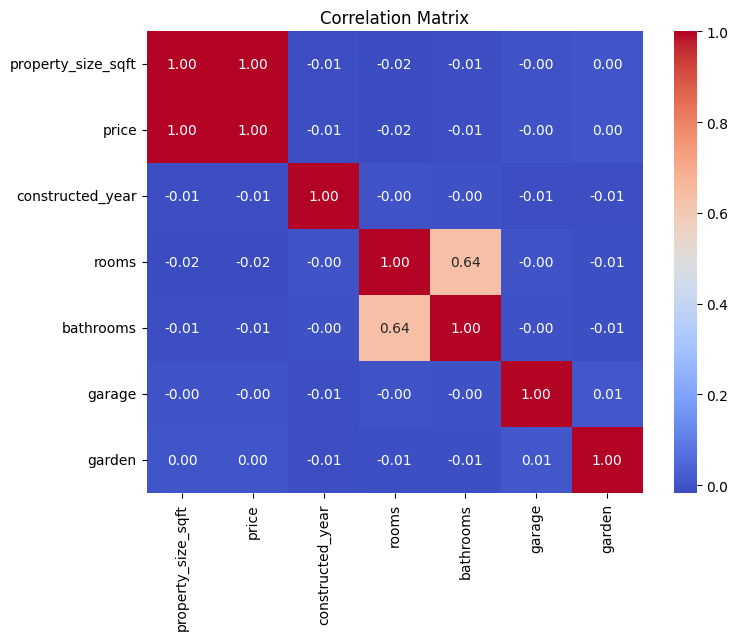

In [104]:
correlation_matrix = df.drop(columns=['country', 'property_type', 'furnishing_status']).corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Mechine Learning

In [105]:
df = pd.get_dummies(df, columns=['property_type', 'furnishing_status'])
df.head()

,country,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden,property_type_Apartment,property_type_Farmhouse,property_type_Independent House,property_type_Studio,property_type_Townhouse,property_type_Villa,furnishing_status_Fully-Furnished,furnishing_status_Semi-Furnished,furnishing_status_Unfurnished
14,UK,4514,1806300,2003,3,1,1,0,False,False,False,True,False,False,False,False,True
15,UK,5519,2209937,2019,8,6,0,1,False,False,True,False,False,False,True,False,False
19,UK,3951,1584521,1979,4,2,1,1,False,False,False,True,False,False,False,True,False
23,UK,4718,1891634,2012,8,5,1,1,False,False,False,False,True,False,False,False,True
26,UK,3552,1424120,1962,5,2,1,0,False,True,False,False,False,False,False,False,True


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15413 entries, 14 to 199974
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   country                            15413 non-null  object
 1   property_size_sqft                 15413 non-null  int64 
 2   price                              15413 non-null  int64 
 3   constructed_year                   15413 non-null  int64 
 4   rooms                              15413 non-null  int64 
 5   bathrooms                          15413 non-null  int64 
 6   garage                             15413 non-null  int64 
 7   garden                             15413 non-null  int64 
 8   property_type_Apartment            15413 non-null  bool  
 9   property_type_Farmhouse            15413 non-null  bool  
 10  property_type_Independent House    15413 non-null  bool  
 11  property_type_Studio               15413 non-null  bool  
 12  propert

In [107]:
X = df.drop(['price', 'country'], axis=1)
y = df['price']

In [108]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Linear Regresion Model and Visualitation

In [109]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
print("Linier Regresion  R² : ", r2_score(y_test, y_pred_lr))
print("Linier Regresion RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linier Regresion  R² :  0.9999800960658244
Linier Regresion RMSE :  2860.6395308208853


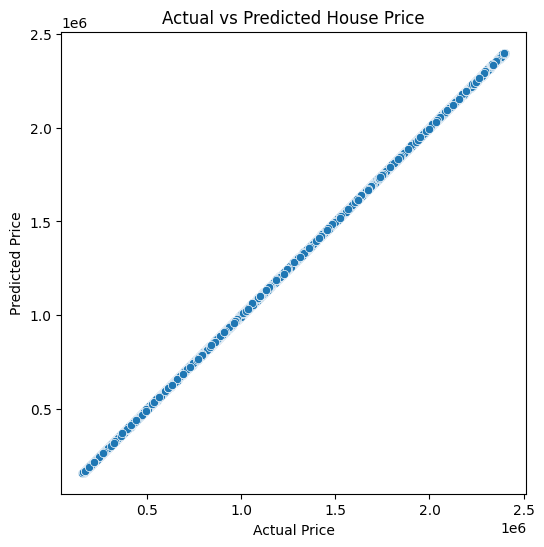

In [110]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=lr.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Decision Tree Model and Visualitation

In [111]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
print("Decision Tree  R² : ", r2_score(y_test, y_pred_dt))
print("Decision Tree RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Decision Tree  R² :  0.9999578248070035
Decision Tree RMSE :  4164.110175829242


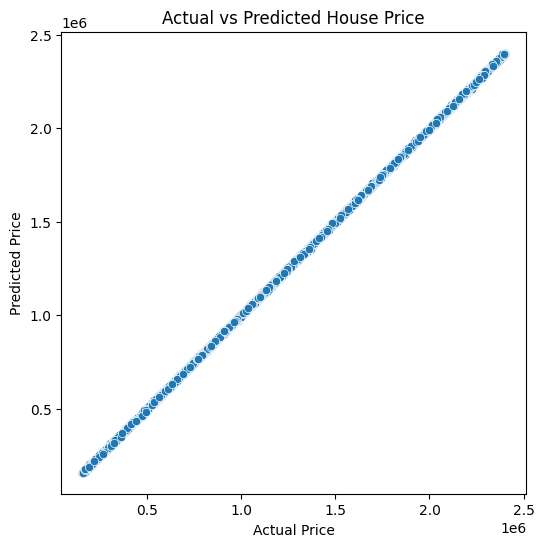

In [112]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=dt.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Random Forest Model and Visualitation

In [113]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
print("Random Forest  R² : ", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Random Forest  R² :  0.9999755799421254
Random Forest RMSE :  4164.110175829242


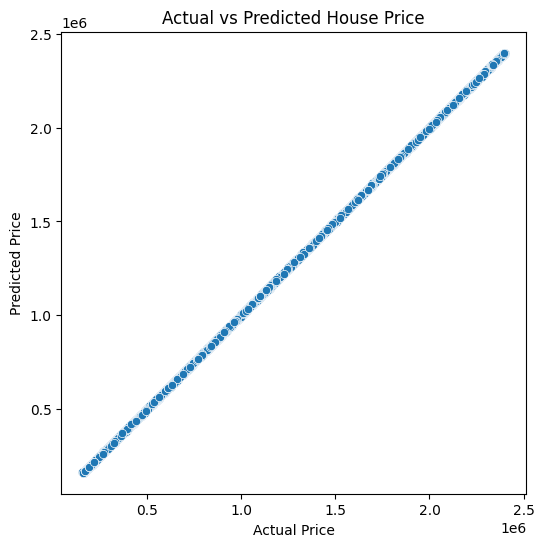

In [114]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=rf.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Gradient Boost Model and Visualization

In [115]:
gb=GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb=gb.predict(X_test)
print("Gradient Boost  R² : ", r2_score(y_test, y_pred_gb))
print("Gradient Boost RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Gradient Boost  R² :  0.9999279044809134
Gradient Boost RMSE :  4164.110175829242


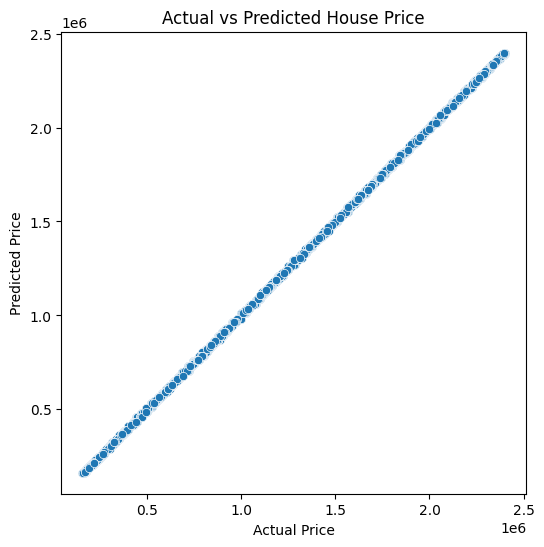

In [116]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=gb.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Result : $R^2$ and $RMSE$

In [117]:
result=pd.DataFrame({'metode':['lr', 'dt', 'rf', 'gb'],
       'R²':[ r2_score(y_test, y_pred_lr),
             r2_score(y_test, y_pred_dt),
             r2_score(y_test, y_pred_rf),
            r2_score(y_test, y_pred_gb)],
       'RMSE':[np.sqrt(mean_squared_error(y_test, y_pred_lr)),
               np.sqrt(mean_squared_error(y_test, y_pred_dt)),
              np.sqrt(mean_squared_error(y_test, y_pred_rf)),
              np.sqrt(mean_squared_error(y_test, y_pred_gb))]})


In [118]:
result

,metode,R²,RMSE
0,lr,0.999980,2860.639531
1,dt,0.999958,4164.110176
2,rf,0.999976,3168.597074
3,gb,0.999928,5444.372216
